Shape of X: (2, 400)
Shape of Y: (1, 400)


C:\Users\user\AppData\Local\Temp\ipykernel_8540\1247950428.py:38: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  % float(


Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


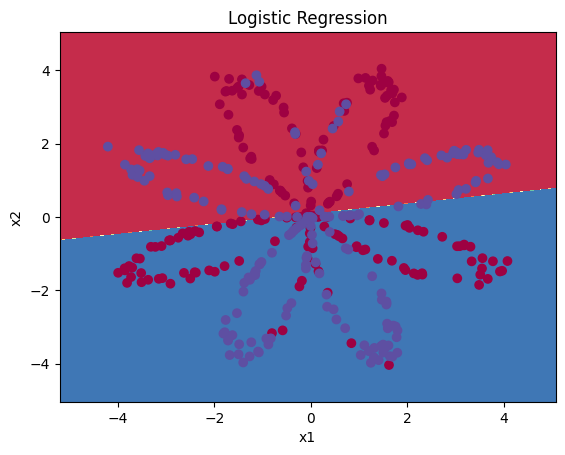

In [65]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
from testCases import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import (
    plot_decision_boundary,
    sigmoid,
    load_planar_dataset,
    load_extra_datasets,
)

%matplotlib inline

np.random.seed(1)

X, Y = load_planar_dataset()

# visualize the data 
plt.scatter(X[0, :], X[1, :], c=Y, s= 40, cmap=plt.cm.Spectral)
print(f"Shape of X: {X.shape}")
print(f"Shape of Y: {Y.shape}")

# train the logistic regression classifIndexError
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X.T, Y.ravel())

# plot decision boundary 
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Logistic Regression")

# Print accuracy
LR_predictions = clf.predict(X.T)
print(
    "Accuracy of logistic regression: %d "
    % float(
        (np.dot(Y, LR_predictions) + np.dot(1 - Y, 1 - LR_predictions))
        / float(Y.size)
        * 100
    )
    + "% "
    + "(percentage of correctly labelled datapoints)"
)

In [66]:
def layer_sizes(X, Y):
    n_h = 4
    return X.shape[0], n_h, Y.shape[0]

# run my sanity checks 
X_assess, Y_assess = layer_sizes_test_case()
n_x, n_h, n_y = layer_sizes(X_assess, Y_assess)
print(f"Input layer size is {n_x}")
print(f"Hidden layer size is {n_h}")
print(f"Output layer size is {n_y}")

Input layer size is 5
Hidden layer size is 4
Output layer size is 2


In [67]:
# initialize_parameters
def initialize_parameters(n_x, n_h, n_y):

    #  set up a seed so that the output matches my output
    np.random.seed(2)
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 =np.zeros((n_y, 1))

    # sanity check
    assert W1.shape == (n_h, n_x)
    assert b1.shape == (n_h, 1)
    assert W2.shape == (n_y, n_h)
    assert b2.shape == (n_y, 1)
    return {"W1" : W1, "b1" : b1, "W2" : W2, "b2" : b2}

n_x, n_h, n_y = initialize_parameters_test_case()
parameters = initialize_parameters(n_x, n_h, n_y)
print(f"W1 = {parameters["W1"]}")
print(f"b1 = {parameters["b1"]}")
print(f"W2 = {parameters["W2"]}")
print(f"b2 = {parameters["b2"]}")

W1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = [[0.]]


In [68]:
def forward_propagation(X, parameters):
    # retrieve all the parameters from the dictionary parameters
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    # Implement Forward Propagation to calculate A2 (probabilities)
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    # sanity check
    # assert(A2.shape == (1, X.shape[1]))

    cache = {"Z1" : Z1, "A1" : A1, "Z2" : Z2, "A2" : A2}


    return A2, cache
# run our test case 
X_assess, parameters = forward_propagation_test_case()
A2, cache = forward_propagation(X_assess, parameters)
print(np.mean(cache['Z1']) ,np.mean(cache['A1']),np.mean(cache['Z2']),np.mean(cache['A2']))

-0.0004997557777419913 -0.000496963353231779 0.00043818745095914653 0.500109546852431


In [69]:
def compute_cost(A2, Y, parameters):
    m = Y.shape[1]

    cost = (-1/m) * np.sum(Y * np.log(A2 + 1e-8) + (1 - Y) * np.log(1 - A2 + 1e-8))

    # make sure that cost is in the dimensions we want
    cost = np.squeeze(cost)

    # sanity check 
    assert isinstance(cost, float)

    return cost

A2, Y_assess, parameters = compute_cost_test_case()
cost = compute_cost(A2, Y_assess, parameters)
print (cost)

0.6929198737806708


In [70]:
def back_propagation(parameters, cache,  X, Y):
    m = X.shape[1]
    # retrieve W1 and W2 from the dictionary "parameters"
    W1 = parameters['W1']
    W2 = parameters['W2']

    # retrieve A1 and A2 from the dictionary "cache"
    A1 = cache["A1"]
    A2 = cache["A2"]

    dZ2 = A2 - Y
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis = 1, keepdims = True)

    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
    dW1 = (1/m) * np.dot(dZ1, X.T)
    db1 = (1/m) * np.sum(dZ1, axis = 1, keepdims = True)
    
    grads = {"dW1" : dW1, "db1" : db1, "dW2" : dW2, "db2" : db2}

    return grads

parameters, cache, X_assess, Y_assess = backward_propagation_test_case()
grads = back_propagation(parameters, cache, X_assess, Y_assess)
print(f"dW1 : {grads["dW1"]}")
print("db1 = " + str(grads["db1"]))
print("dW2 = " + str(grads["dW2"]))
print("db2 = " + str(grads["db2"]))

dW1 : [[ 0.01018708 -0.00708701]
 [ 0.00873447 -0.0060768 ]
 [-0.00530847  0.00369379]
 [-0.02206365  0.01535126]]
db1 = [[-0.00069728]
 [-0.00060606]
 [ 0.000364  ]
 [ 0.00151207]]
dW2 = [[ 0.00363613  0.03153604  0.01162914 -0.01318316]]
db2 = [[0.06589489]]


In [71]:
def update_parameters(grads, parameters,learning_rate):
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    # Retrieve each gradient from the dictionary "grads"
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]

    # Update rule for each parameter
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    parameters = {"W1" : W1, "b1" : b1, "W2" : W2, "b2" : b2}

    return parameters

parameters, grads = update_parameters_test_case()
parameters = update_parameters(grads, parameters, 1.2)
print(f"W1 : {parameters["W1"]}")
print(f"b1 : {parameters["b1"]}")
print(f"W2 : {parameters["W2"]}")
print(f"b2 : {parameters["b2"]}")

W1 : [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]
b1 : [[-1.02420756e-06]
 [ 1.27373948e-05]
 [ 8.32996807e-07]
 [-3.20136836e-06]]
W2 : [[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2 : [[0.00010457]]


In [73]:
def nn_model(X, Y, n_h, learning_rate, num_iterations=10000, print_cost=False):
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]

    # Initialize parameters
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    # Loop (gradient descent)
    for i in range(0, num_iterations):
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache"
        A2, cache = forward_propagation(X, parameters)
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost"
        cost = compute_cost(A2, Y, parameters)
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads"
        grads = back_propagation(parameters, cache, X, Y)
        # Update rule for each parameter
        parameters = update_parameters(grads, parameters,learning_rate)
        # If print_cost=True, Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print("Cost after iteration %i: %f" % (i, cost))
    # Returns parameters learnt by the model. They can then be used to predict output
    return parameters
X, Y = load_planar_dataset()
parameters = nn_model(
    X, Y, 4, 0.5, num_iterations=10000, print_cost=True
)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

Cost after iteration 0: 0.693048
Cost after iteration 1000: 0.309802
Cost after iteration 2000: 0.292433
Cost after iteration 3000: 0.283349
Cost after iteration 4000: 0.276781
Cost after iteration 5000: 0.263472
Cost after iteration 6000: 0.242044
Cost after iteration 7000: 0.235525
Cost after iteration 8000: 0.231410
Cost after iteration 9000: 0.228464
W1 = [[ 0.01870858 -8.21043902]
 [-7.39858159  2.47925859]
 [-7.30446223 -8.66499686]
 [ 7.26595481 -8.01577042]]
b1 = [[-0.06509077]
 [-0.37092948]
 [-0.07460722]
 [ 0.06291628]]
W2 = [[-8.96576719  2.90911475  4.96719744  8.17404923]]
b2 = [[-0.04588772]]


In [74]:
def predict(parameters, X):
    A2, cache = forward_propagation(X, parameters)
    predictions = A2 > 0.5
    return predictions

parameters, X_assess = predict_test_case()
predictions = predict(parameters, X_assess)
print(f"prediction: {np.mean(predictions)}")

prediction: 0.6666666666666666


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

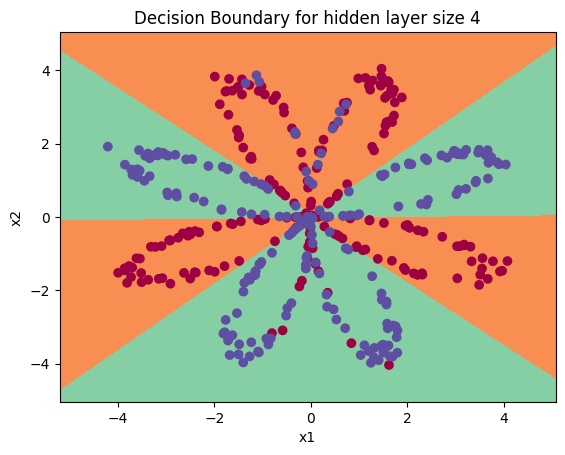

In [76]:
# see how the model performs on a planer the dataset
parameters = nn_model(X, Y, n_h = 4, learning_rate = 1.2, num_iterations=10000, print_cost=False)

# plot decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

In [77]:
# Print accuracy
predictions = predict(parameters, X)
print(
    "Accuracy: %d"
    % float(
        (np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T))
        / float(Y.size)
        * 100
    )
    + "%"
)

Accuracy: 90%


C:\Users\user\AppData\Local\Temp\ipykernel_8540\3070864498.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  % float(


C:\Users\user\AppData\Local\Temp\ipykernel_8540\2023615137.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  accuracy = float(


Accuracy for 1 hidden units: 67.5 %
Accuracy for 2 hidden units: 67.25 %
Accuracy for 3 hidden units: 90.75 %
Accuracy for 4 hidden units: 90.5 %
Accuracy for 5 hidden units: 91.25 %
Accuracy for 20 hidden units: 90.5 %
Accuracy for 50 hidden units: 90.75 %


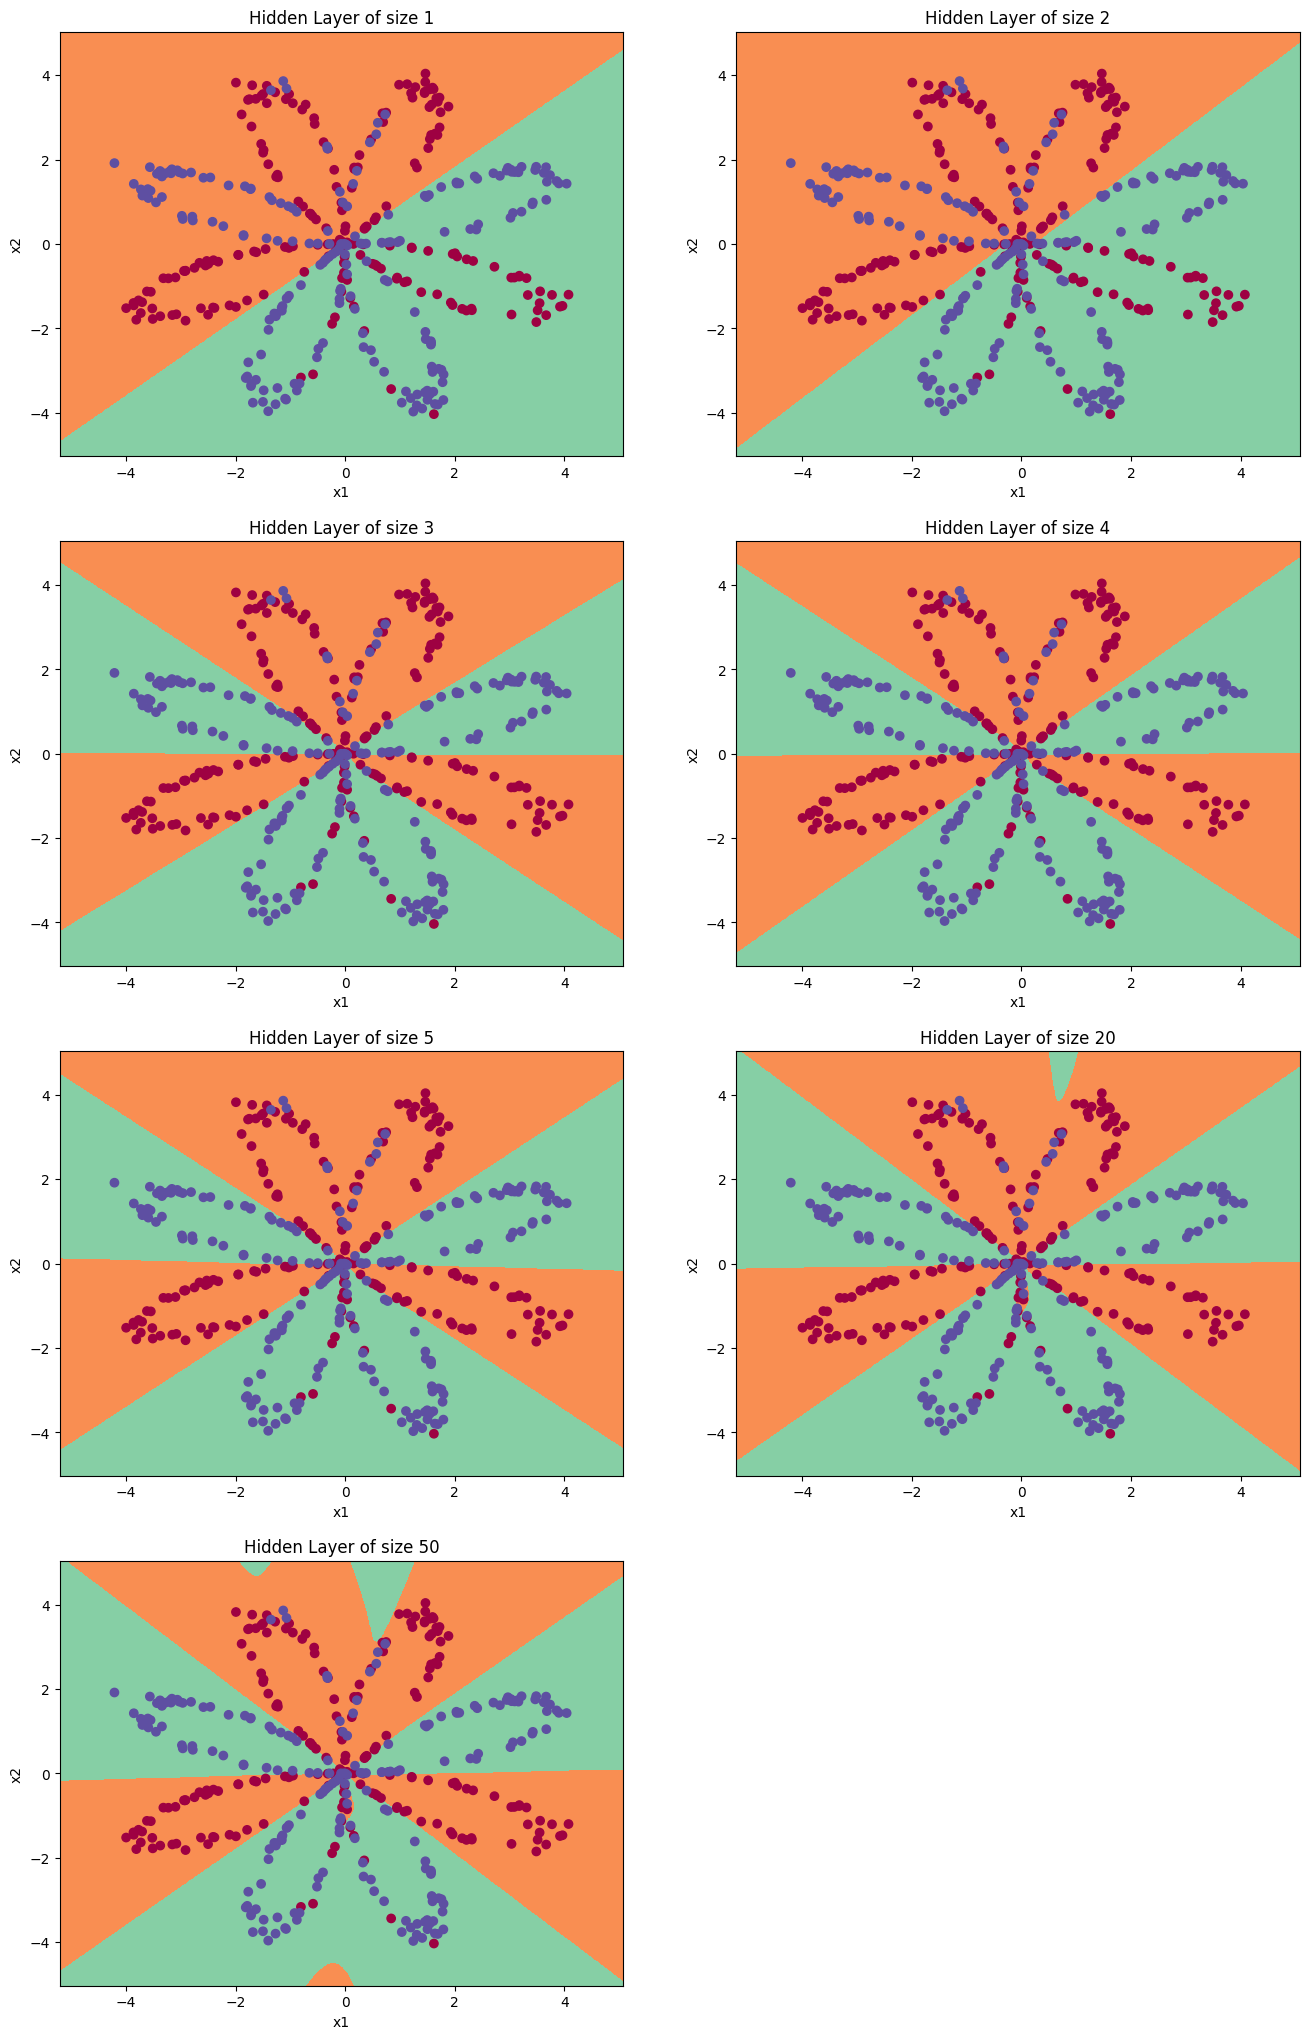

In [78]:
# This may take about 2 minutes to run

plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i + 1)
    plt.title("Hidden Layer of size %d" % n_h)
    parameters = nn_model(X, Y, n_h, 1.2, num_iterations=5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = float(
        (np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T))
        / float(Y.size)
        * 100
    )
    print("Accuracy for {} hidden units: {} %".format(n_h, accuracy))